In [8]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, PowerTransformer

In [9]:
# 2. Create Sample Dataset
data = {
    "Student_ID": range(1, 16),
    "Gender": ['M', 'F', 'F', 'M', 'F', 'M', 'F', 'F', 'M', 'M', 'F', 'F', 'M', 'F', 'M'],
    "Math_Score": [88, 92, 85, 90, 95, 45, 77, np.nan, 99, 52, 65, 84, 74, 88, 110],
    "English_Score": [78, 85, 79, 83, 80, 76, 72, 69, 88, 59, np.nan, 74, 65, 71, 105],
    "Science_Score": [90, 89, 94, 85, 92, 67, 78, 80, 95, 72, 60, 86, 69, 77, 115],
    "Attendance_Rate": [90, 95, 85, 80, 98, 70, 85, 88, np.nan, 60, 75, 85, 70, 90, 120]
}

In [10]:
df = pd.DataFrame(data)
df['Final_Grade'] = df[['Math_Score', 'English_Score', 'Science_Score']].mean(axis=1)

print("Initial Dataset:\n", df)

Initial Dataset:
    Student_ID Gender  Math_Score  English_Score  Science_Score  \
0            1      M        88.0           78.0             90   
1            2      F        92.0           85.0             89   
2            3      F        85.0           79.0             94   
3            4      M        90.0           83.0             85   
4            5      F        95.0           80.0             92   
5            6      M        45.0           76.0             67   
6            7      F        77.0           72.0             78   
7            8      F         NaN           69.0             80   
8            9      M        99.0           88.0             95   
9           10      M        52.0           59.0             72   
10          11      F        65.0            NaN             60   
11          12      F        84.0           74.0             86   
12          13      M        74.0           65.0             69   
13          14      F        88.0           7

In [11]:
 # 1. Scan for Missing Values and Handle Them

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Fill missing numeric values with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Recheck
print("\nAfter filling missing values:\n", df.isnull().sum())


Missing values:
 Student_ID         0
Gender             0
Math_Score         1
English_Score      1
Science_Score      0
Attendance_Rate    1
Final_Grade        0
dtype: int64

After filling missing values:
 Student_ID         0
Gender             0
Math_Score         0
English_Score      0
Science_Score      0
Attendance_Rate    0
Final_Grade        0
dtype: int64


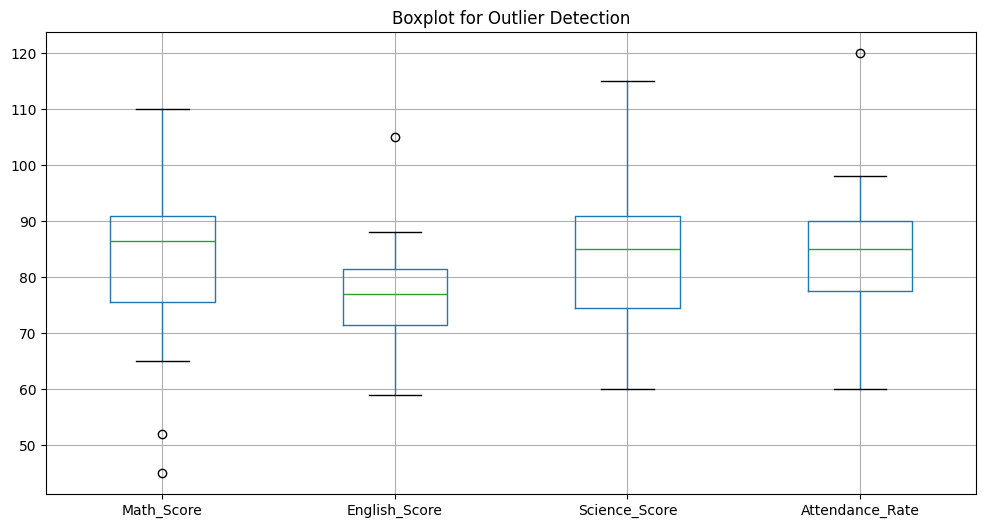


After handling outliers:
       Math_Score  English_Score  Science_Score  Attendance_Rate
count   15.000000      15.000000      15.000000        15.000000
mean    82.533333      76.833333      83.266667        84.316667
std     16.157944       9.326741      13.729357        12.203800
min     52.250000      59.000000      60.000000        60.000000
25%     75.500000      71.500000      74.500000        77.500000
50%     86.500000      77.000000      85.000000        85.000000
75%     91.000000      81.500000      91.000000        90.000000
max    110.000000      96.500000     115.000000       108.750000


In [12]:
#  2. Scan for Outliers and Handle Them

# Boxplots to visualize outliers
plt.figure(figsize=(12, 6))
df[['Math_Score', 'English_Score', 'Science_Score', 'Attendance_Rate']].boxplot()
plt.title("Boxplot for Outlier Detection")
plt.show()

# Capping outliers using IQR method
for col in ['Math_Score', 'English_Score', 'Science_Score', 'Attendance_Rate']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper, upper,
              np.where(df[col] < lower, lower, df[col]))

print("\nAfter handling outliers:")
print(df[['Math_Score', 'English_Score', 'Science_Score', 'Attendance_Rate']].describe())

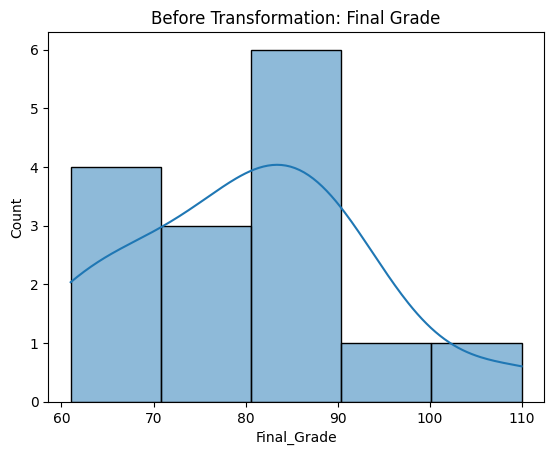

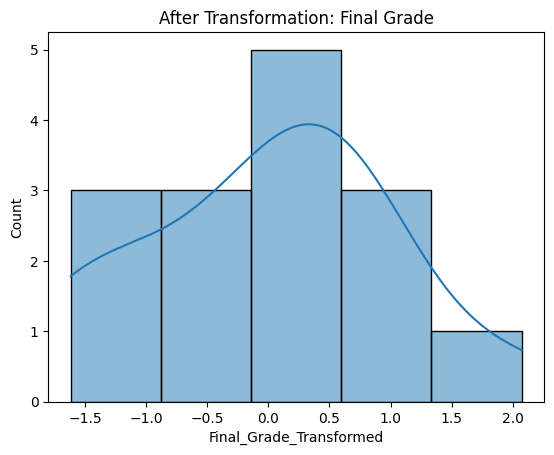

In [7]:
# 3. Data Transformation
# We'll apply Power Transformation to Final_Grade to reduce skewness.


# Check distribution before transformation
sns.histplot(df['Final_Grade'], kde=True)
plt.title("Before Transformation: Final Grade")
plt.show()

# Apply power transformation (Yeo-Johnson)
transformer = PowerTransformer(method='yeo-johnson')
df['Final_Grade_Transformed'] = transformer.fit_transform(df[['Final_Grade']])

# Check distribution after transformation
sns.histplot(df['Final_Grade_Transformed'], kde=True)
plt.title("After Transformation: Final Grade")
plt.show()

In [14]:
# Normalize Numeric Columns

scaler = MinMaxScaler()
num_cols = ['Math_Score', 'English_Score', 'Science_Score', 'Attendance_Rate', 'Final_Grade']
df[num_cols] = scaler.fit_transform(df[num_cols])

print("\nAfter Normalization:")
print(df.head())


After Normalization:
   Student_ID Gender  Math_Score  English_Score  Science_Score  \
0           1      M    0.619048       0.506667       0.545455   
1           2      F    0.688312       0.693333       0.527273   
2           3      F    0.567100       0.533333       0.618182   
3           4      M    0.653680       0.640000       0.454545   
4           5      F    0.740260       0.560000       0.581818   

   Attendance_Rate  Final_Grade  
0         0.615385     0.496599  
1         0.717949     0.564626  
2         0.512821     0.510204  
3         0.410256     0.510204  
4         0.779487     0.571429  
